## Sardinia + Lindo data

The Sardinian ancient samples (5 of them) and the Lindo ancient and moderns data (25 ancient + 25 moderns) were
taken and aRchaic was performed on the pooled data to see the patterns and interpret them.

In [1]:
options(warn=-1)
library(aRchaic)
library(CountClust)
library(maptpx)
library(grid)
library(gridBase)

Loading required package: ggplot2


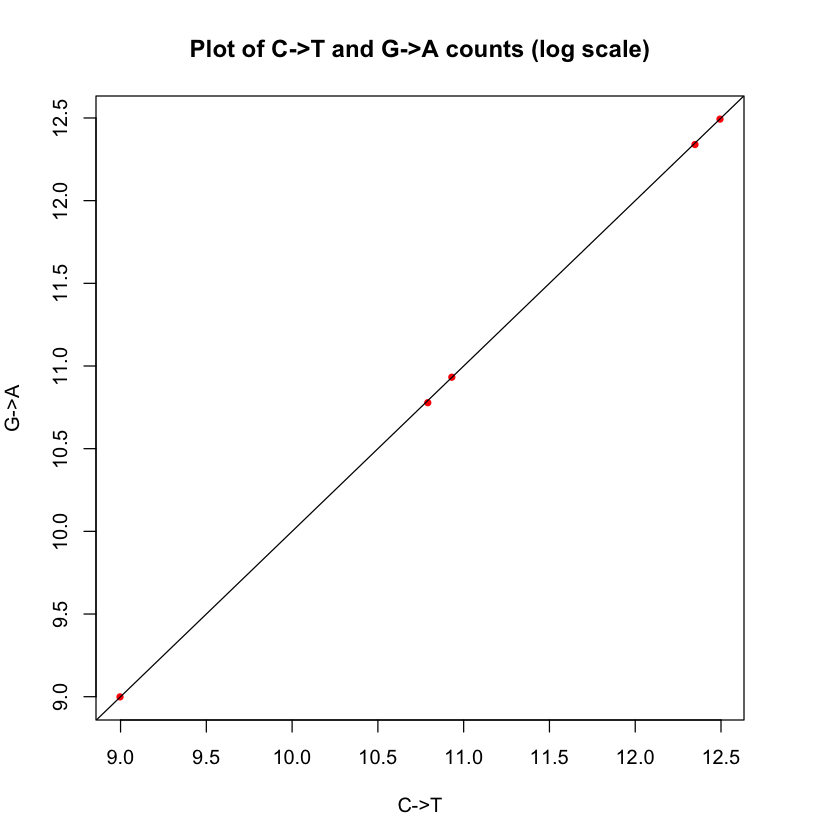

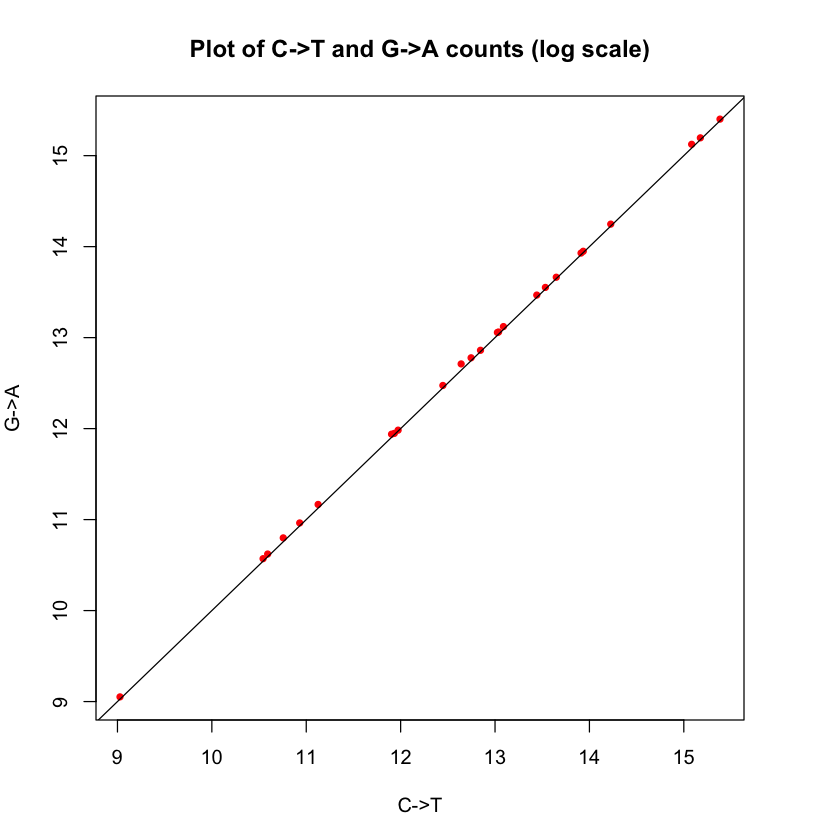

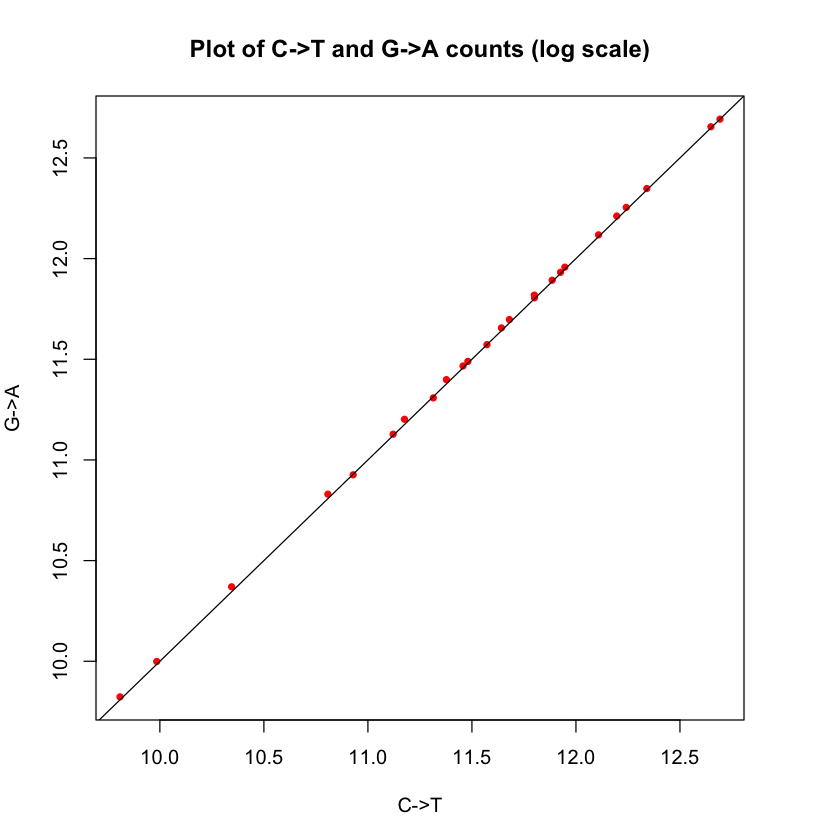

In [2]:
## Pool the data from the Sardinia data and Lindo ancient and moderns data

signature_counts <- get(load("../processed_data/sardinia2017.rda"))
validation_check <- club_signature_validation_plot(signature_counts, log=TRUE)
clubbed_counts_sardinia_ancient <- club_signature_counts(signature_counts)
filtered_counts_sardinia_ancient <- filter_signatures_wo_location(clubbed_counts_sardinia_ancient);


signature_counts <- get(load("../processed_data/lindo2016ancients-counts-table.rda"))
validation_check <- club_signature_validation_plot(signature_counts, log=TRUE)
clubbed_counts_lindo_ancient <- club_signature_counts(signature_counts)
filtered_counts_lindo_ancient <- filter_signatures_wo_location(clubbed_counts_lindo_ancient);

signature_counts <- get(load("../processed_data/lindo2016moderns-counts-table.rda"))
validation_check <- club_signature_validation_plot(signature_counts, log=TRUE)
clubbed_counts_lindo_modern <- club_signature_counts(signature_counts)
filtered_counts_lindo_modern <- filter_signatures_wo_location(clubbed_counts_lindo_modern);


common_signatures <- intersect(colnames(clubbed_counts_lindo_modern),
                               intersect(colnames(clubbed_counts_lindo_ancient),
                               colnames(clubbed_counts_sardinia_ancient)))

clubbed_counts_lindo_modern_1 <- clubbed_counts_lindo_modern[,match(common_signatures, colnames(clubbed_counts_lindo_modern))]
clubbed_counts_lindo_ancient_1 <- clubbed_counts_lindo_ancient[,match(common_signatures, colnames(clubbed_counts_lindo_ancient))]
clubbed_counts_sardinia_ancient_1 <- clubbed_counts_sardinia_ancient[,match(common_signatures, colnames(clubbed_counts_sardinia_ancient))]


clubbed_counts_pooled <- rbind(clubbed_counts_lindo_ancient_1, clubbed_counts_lindo_modern_1,
                                clubbed_counts_sardinia_ancient_1)

In [5]:
topics_clus_1 <- maptpx::topics(clubbed_counts_pooled, K=3, type="full", tol=100)
save(topics_clus_1, file="../processed_data/maptpx-runs/sardinia-lindo-maptpx-full-K3")


Estimating on a 55 document collection.
Fitting the 3 topic model.
log posterior increase: 14895014.7, 761013.9, 581142.4, 23577.8, 21591.8, 11050.3, 7456.8, 5810.4, 3931.7, 2192.2, 1448.4, 1206.8, 969.5, 794.5, 648.1, 601.1, 514.4, 400, 306.2, 275.4, 275.6, 240.9, 214.8, 194.5, 161.9, 166.4, 150.8, 151.1, 164.1, 162, 139.4, 127.8, 128.4, 132.3, 119.3, 116.7, 113.8, done.


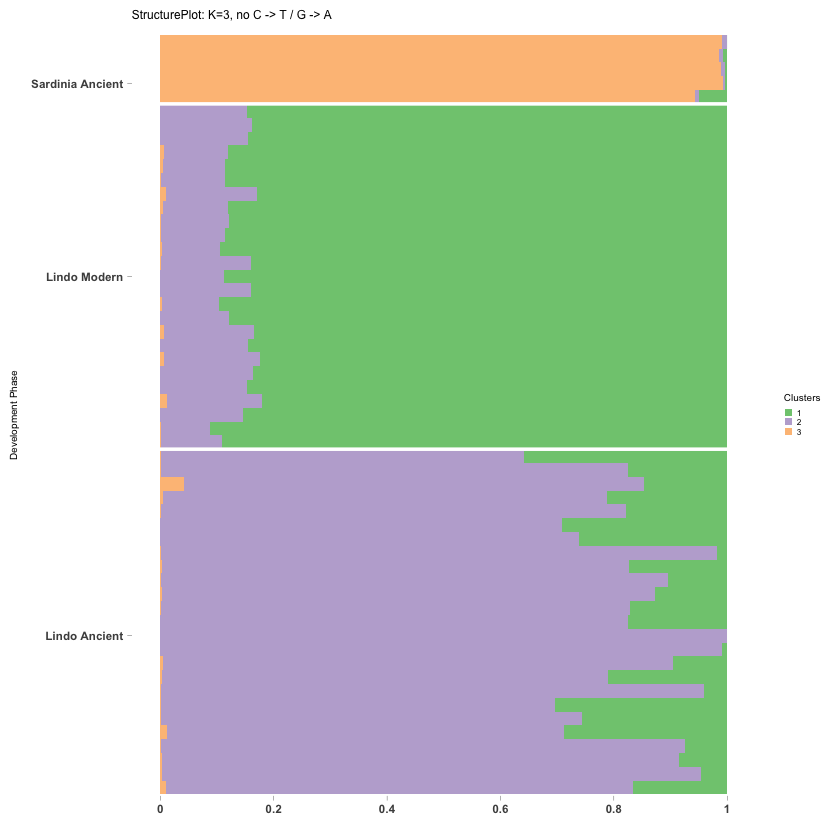

In [6]:
topics_clus_1 <- get(load("../processed_data/maptpx-runs/sardinia-lindo-maptpx-full-K3"))


labs <- c(rep("Lindo Ancient",25), rep("Lindo Modern",25), rep("Sardinia Ancient",5))

omega <- topics_clus_1$omega

annotation <- data.frame(
  sample_id = paste0("X", c(1:NROW(omega))),
  tissue_label = factor(labs)
)

rownames(omega) <- annotation$sample_id;

CountClust::StructureGGplot(omega = omega,
                            annotation = annotation,
                            palette = RColorBrewer::brewer.pal(8, "Accent"),
                            yaxis_label = "Development Phase",
                            order_sample = FALSE,
                            figure_title = paste0("StructurePlot: K=", dim(omega)[2],", no C -> T / G -> A"),
                            axis_tick = list(axis_ticks_length = .1,
                                             axis_ticks_lwd_y = .1,
                                             axis_ticks_lwd_x = .1,
                                             axis_label_size = 7,
                                             axis_label_face = "bold"))



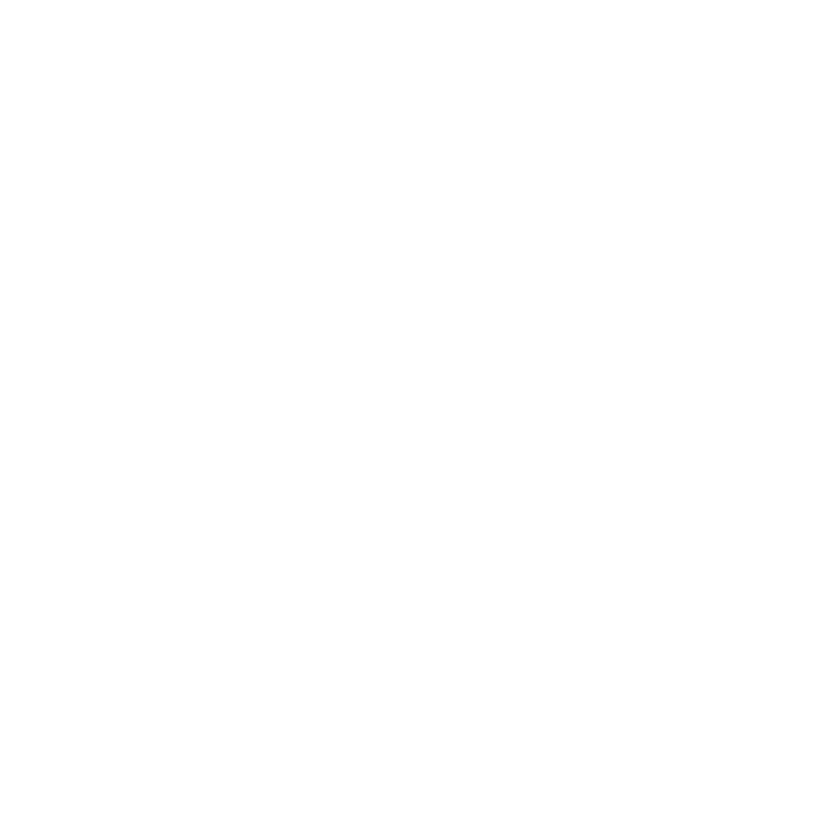

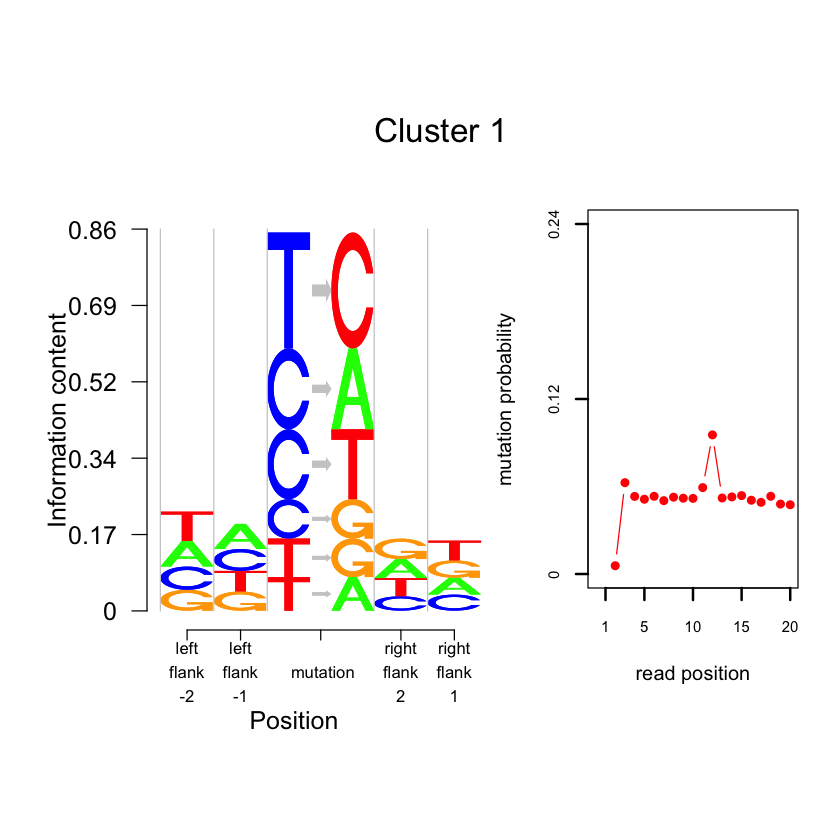

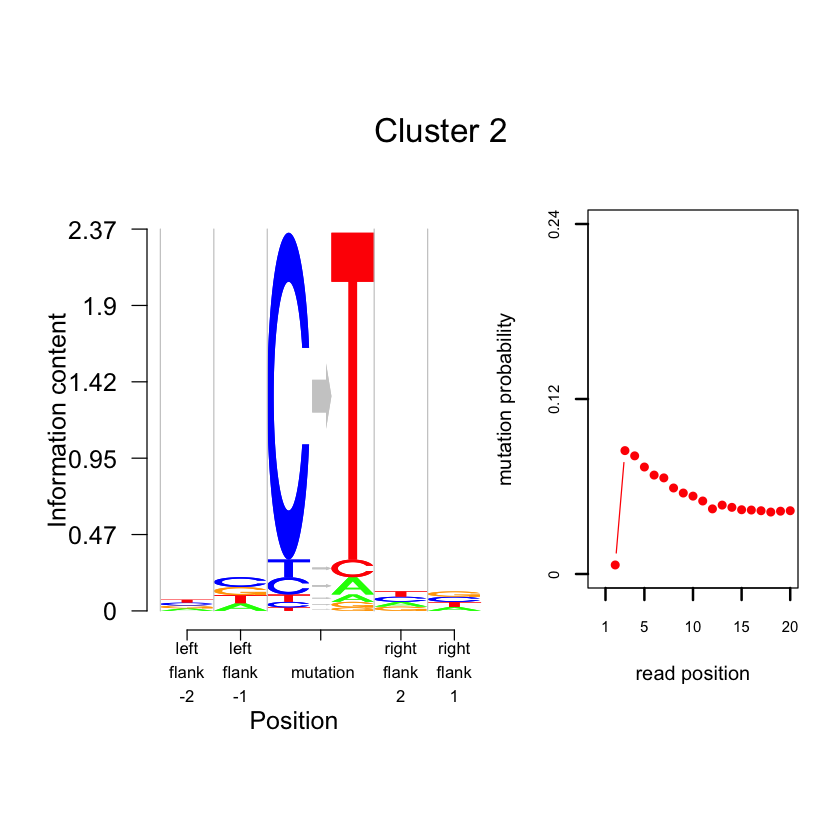

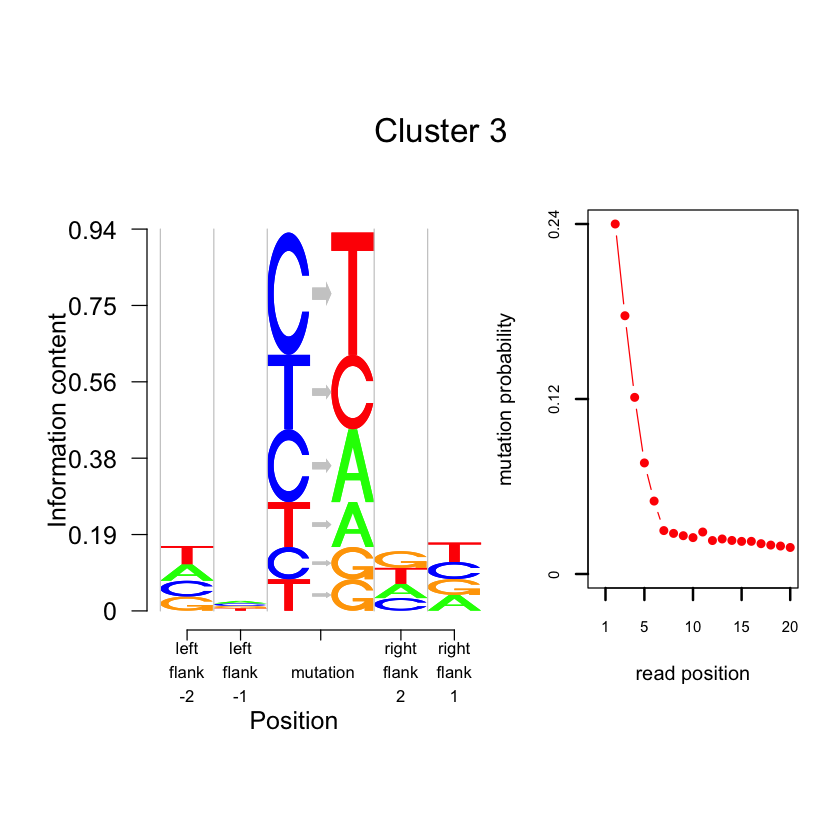

In [9]:
plot.new()
damageLogo_pos(topics_clus_1$theta, renyi_alpha=100)

### Summary

For K=3, we find that both the Lindo moderns and Lindo ancients act differently from the Sardinian samples. 
Partly this is because the Lindo samples were compromised in the first position of soft clipping. Also, interesting
to see that the Sardinian cluster is not so much dominated by C to T as a general ancient cluster would be.

In [10]:
sessionInfo()

R version 3.3.1 (2016-06-21)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X 10.12 (Sierra)

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] gridBase_0.4-7   maptpx_1.9-3     CountClust_0.1.2 ggplot2_2.2.1   
[5] aRchaic_0.99.0  

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.8         RColorBrewer_1.1-2  plyr_1.8.4         
 [4] tools_3.3.1         boot_1.3-18         digest_0.6.11      
 [7] uuid_0.1-2          nlme_3.1-128        jsonlite_1.2       
[10] evaluate_0.10       tibble_1.2          gtable_0.2.0       
[13] lattice_0.20-34     mgcv_1.8-16         Matrix_1.2-7.1     
[16] IRdisplay_0.4.4     parallel_3.3.1      IRkernel_0.7.1     
[19] gridExtra_2.2.1     cluster_2.0.5       repr_0.10          
[22] stringr_1.1.0       gtools_3.5.0        stats4_3.3.1       
[25] nnet_7.3-12    